In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# DATA_ROOT = "~/nba-3d-data/harden"
DATA_ROOT = '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden'
def to_uint8(img):
    return (img/img.max()*255.).astype(np.uint8)

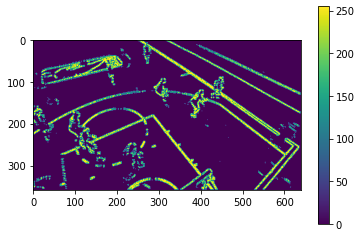

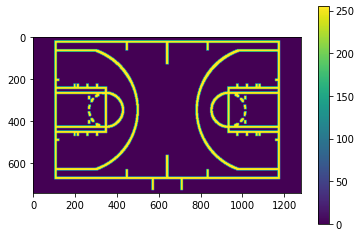

In [3]:
img = plt.imread(DATA_ROOT+'/all_frames/frame_00039.png')
img_ep = cv2.edgePreservingFilter(to_uint8(img))
gray_ep = cv2.cvtColor(img_ep, cv2.COLOR_RGB2GRAY)
sobel = cv2.Sobel(gray_ep, cv2.CV_32F, 1, 1, ksize=3)
sobel = cv2.equalizeHist(to_uint8(np.abs(sobel)))
img1 = (sobel>125).astype(np.uint8)*255
plt.imshow(img1);plt.colorbar();plt.show()

court = cv2.imread('/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/court.png')
gray = cv2.cvtColor(court, cv2.COLOR_RGBA2GRAY)
binary = gray<0.1
binary = cv2.dilate(binary.astype(np.uint8), np.ones((5,5), dtype=np.uint8))
binary = cv2.resize(binary, tuple([2*x for x in gray.shape[::-1]]))


img2 = binary.astype(np.uint8)*255
plt.imshow(img2);plt.colorbar();plt.show()

In [ ]:
def draw_keypoints(img, kp):
    temp = img.copy()
    for kpi in kp:
        temp = cv2.circle(temp, tuple([int(x) for x in kpi.pt]), img.shape[0]//50, [100], -1)
    plt.imshow(temp)

In [103]:
MIN_MATCH_COUNT = 10

img1;          # queryImage
img2;          # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
# kp1 = sift.detect(img1)
# kp2 = sift.detect(img2)


kp1 = np.where(img1>155)
kp1 = [cv2.KeyPoint(float(y), float(x), _size=10) for x,y in zip(kp1[0], kp1[1])]
kp2 = np.where(img2>155)
kp2 = [cv2.KeyPoint(float(y), float(x), _size=10) for x,y in zip(kp2[0], kp2[1])]
kp1 = kp1[::10]
kp2 = kp2[::50]
print(len(kp1))
print(len(kp2))


kp1, des1 = sift.compute(img1, kp1)
kp2, des2 = sift.compute(img2, kp2)

2310
2376


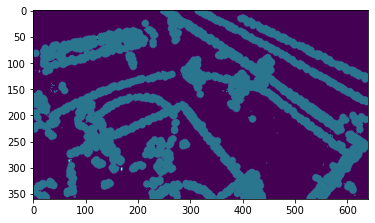

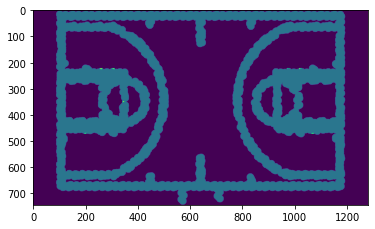

In [104]:
draw_keypoints(img1, kp1);plt.show()
draw_keypoints(img2, kp2);plt.show()

2310
Not enough matches are found - 0/10


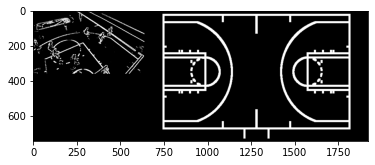

(<matplotlib.image.AxesImage at 0x7f9c8cdd68e0>, None)

In [105]:


FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

print(len(matches))

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

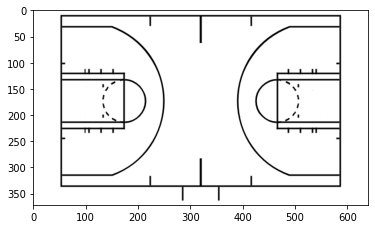

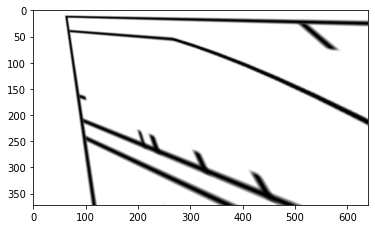

In [29]:
M = np.eye(3)+0.005*np.random.uniform(-1, 1, size=(3,3))
courtp = cv2.warpPerspective(court, M, dsize=court.shape[:2][::-1])
plt.imshow(court);plt.show()
plt.imshow(courtp);plt.show()

In [27]:
np.set_printoptions(suppress=True, precision=5)
M

array([[ 0.99713, -0.00269,  0.00817],
       [-0.00067,  1.00051, -0.0085 ],
       [ 0.00957,  0.00388,  0.99981]])